In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

data = "/home/ronald/Documents/Physics_classes/Classes/Labs/Python_macros/Frequency_voltaje/data.xlsx"
data = pd.read_excel(data)
print(data)

    f (Hz)  V(mV)  errorV (mV)
0       10     16            5
1       20     45            5
2       30     64            5
3       40     75            5
4       50     70           30
5       60    115            5
6       70    142            5
7       80    167            5
8       90    183            5
9      100    160           30
10     110    221            5


Slope: 1.907272727274706 ± 0.149947886231307
Intercept: -0.0727272727295909 ± 10.169958028984754
Residuals: 0     -3.000000
1      6.927273
2      6.854545
3     -1.218182
4    -25.290909
5      0.636364
6      8.563636
7     14.490909
8     11.418182
9    -30.654545
10    11.272727
dtype: float64


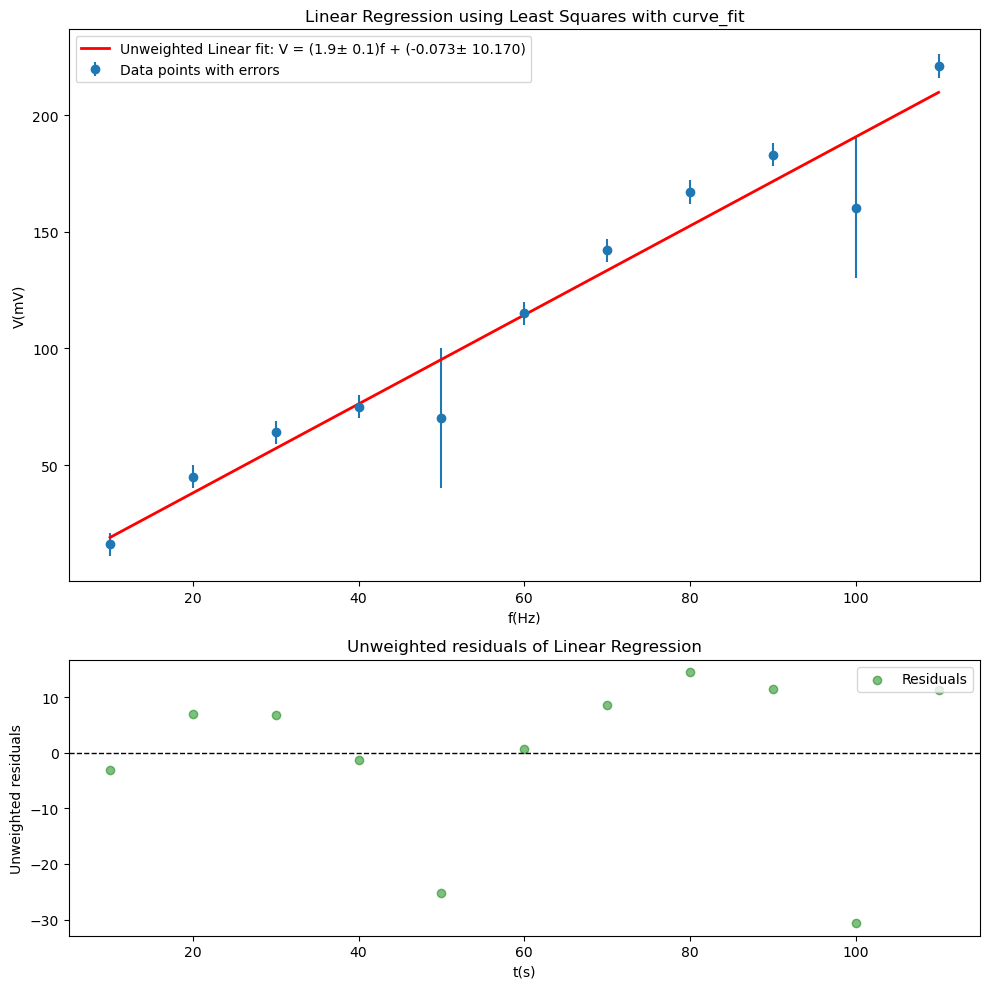

In [2]:

# Define the linear function for curve fitting
def linear_function(X, a, b):
    return a * X + b

x = data['f (Hz)']
y = data['V(mV)']
yerr = data['errorV (mV)']

# Perform the curve fitting
popt, pcov = curve_fit(linear_function, x, y)

# Get the slope and intercept
slope = popt[0]
intercept = popt[1]

# Get the standard errors for the parameters
slope_std_err = np.sqrt(pcov[0, 0])
intercept_std_err = np.sqrt(pcov[1, 1])

# Predict the Y values
Y_pred = linear_function(x, *popt)

# Calculate residuals
residuals = y - Y_pred

print(f"Slope: {slope} ± {slope_std_err}")
print(f"Intercept: {intercept} ± {intercept_std_err}")
print(f"Residuals: {residuals}")


# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 10), gridspec_kw={'height_ratios': [2, 1]})  # 2 rows, 1 column, width = 10 inches, height = 10 inches

# Plot the regression line
ax1.errorbar(x, y, yerr, fmt='o', label='Data points with errors')
ax1.plot(x, Y_pred, color='red', linewidth=2, label=f'Unweighted Linear fit: V = ({slope:.1f}± {slope_std_err:.1f})f + ({intercept:.3f}± {intercept_std_err:.3f})')

ax1.set_xlabel('f(Hz)')
ax1.set_ylabel('V(mV)')
ax1.legend(loc='upper left')
ax1.set_title('Linear Regression using Least Squares with curve_fit')

# Plot residuals
ax2.scatter(x, residuals, color='green', alpha=0.5, label='Residuals')
ax2.axhline(0, color='black', linewidth=1, linestyle='--')
ax2.set_xlabel('t(s)')
ax2.set_ylabel('Unweighted residuals')
ax2.legend(loc='upper right')
ax2.set_title('Unweighted residuals of Linear Regression')

plt.tight_layout()

# Save the figure as a PDF file
plt.savefig('Unweighted_linear_regression_with_residuals_curve_fit.pdf', format='pdf')
plt.show()

